## Fetching the dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
import numpy as np

In [6]:
x = mnist.data
y = mnist.target.astype(np.int8)

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int8

## Plotting image

In [11]:
import matplotlib.pyplot as plt

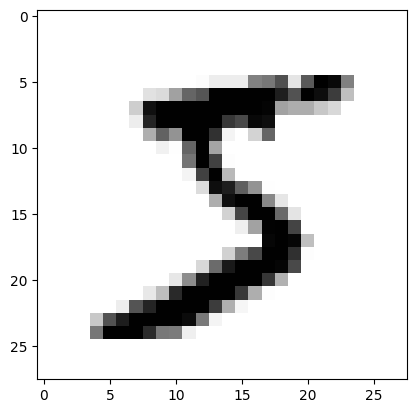

In [12]:
digit_image = x.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(digit_image, cmap= 'binary')

In [13]:
y.iloc[0]

5

## Splitting Training Test

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15)

In [15]:
x_train, x_test, y_train, y_test

(       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 57662       0       0       0       0       0       0       0       0       0   
 24618       0       0       0       0       0       0       0       0       0   
 61030       0       0       0       0       0       0       0       0       0   
 21851       0       0       0       0       0       0       0       0       0   
 23249       0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 42350       0       0       0       0       0       0       0       0       0   
 22186       0       0       0       0       0       0       0       0       0   
 49787       0       0       0       0       0       0       0       0       0   
 60043       0       0       0       0       0       0       0       0       0   
 34042       0       0       0       0       0       0       0       0       0   
 
        pixel1

# Model
Creating a binary classifier using logistic regression to classify that the value is 2 or not

In [16]:
# from sklearn.linear_model import SGDClassifier  #can also use this it is preferred
from sklearn.linear_model import LogisticRegression

In [17]:
y_train_2 = y_train == 2
y_test_2 = y_test == 2

In [18]:
y_train_2, y_test_2

(57662    False
 24618     True
 61030    False
 21851    False
 23249    False
          ...  
 42350    False
 22186    False
 49787    False
 60043     True
 34042    False
 Name: class, Length: 59500, dtype: bool,
 7888     False
 29492    False
 20330    False
 16554    False
 64621    False
          ...  
 6352     False
 10044    False
 35806    False
 18272    False
 5969     False
 Name: class, Length: 10500, dtype: bool)

In [19]:
clf = LogisticRegression(tol= 0.1)

In [20]:
clf.fit(x_train, y_train_2)

LogisticRegression(tol=0.1)

In [21]:
prediction = clf.predict(x_test)

In [22]:
prediction

array([False, False, False, ..., False, False, False])

In [23]:
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
some_digit = x_test.iloc[0].to_numpy().reshape(1, -1)

In [25]:
clf.predict(some_digit)

C:\Users\Harshit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [26]:
y_test_2.loc[y_test_2]

46678    True
24582    True
41082    True
42309    True
67528    True
         ... 
57439    True
58928    True
7326     True
18413    True
67345    True
Name: class, Length: 1113, dtype: bool

In [27]:
y_test.iloc[0]

5

## Validating

In [28]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [29]:
accuracy = cross_val_score(clf, x_train, y_train_2, scoring= 'accuracy', cv= 3)

In [30]:
accuracy

array([0.97867299, 0.97831896, 0.97857107])

In [31]:
accuracy.mean()

0.9785210058490769

In [32]:
cross_val_predict(clf, x_train, y_train_2)

array([False,  True, False, ..., False,  True, False])

## Confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test_2, prediction)

array([[9315,   72],
       [ 151,  962]], dtype=int64)

In [35]:
confusion_matrix(y_test_2, y_test_2)

array([[9387,    0],
       [   0, 1113]], dtype=int64)

## Precision and Recall

In [36]:
from sklearn.metrics import precision_score, recall_score

In [37]:
precision_score(y_test_2, prediction)

0.9303675048355899

In [38]:
recall_score(y_test_2, prediction)

0.8643306379155435

## F1-Score

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_test_2, prediction)

0.896134140661388

## Precision Recall Curve

In [41]:
from sklearn.metrics import precision_recall_curve

In [42]:
pred_score = cross_val_predict(clf, x_train, y_train_2, method= 'decision_function')

In [43]:
pred_score

array([-6.00344248,  4.37694422, -3.56165054, ..., -5.30814446,
        2.64813552, -3.3887449 ])

In [44]:
precision, recall, threshold = precision_recall_curve(y_train_2, pred_score)

In [45]:
precision

array([0.09877311, 0.09877477, 0.09877643, ..., 1.        , 1.        ,
       1.        ])

In [46]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.40309682e-04, 1.70154841e-04, 0.00000000e+00])

In [47]:
threshold

array([-37.37210427, -35.98870019, -35.19420462, ...,  16.31878462,
        16.86378633,  17.10258698])

Text(0.5, 0, 'Threshold')

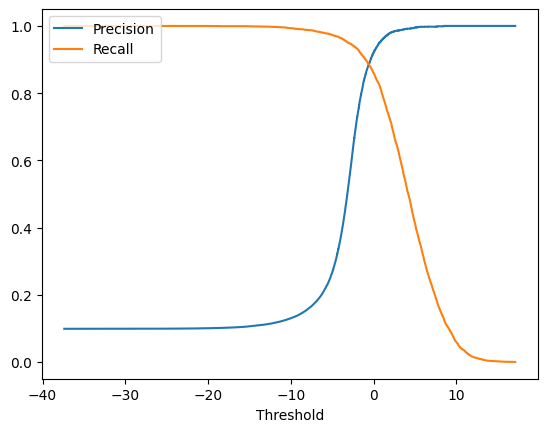

In [48]:
#removing last value from precison and recall as scikit learn adds 0 and 1 in them so that the graph starts from there
plt.plot(threshold, precision[:-1], label= 'Precision')
plt.plot(threshold, recall[:-1], label= 'Recall')
plt.legend(loc= 'upper left')
plt.xlabel("Threshold")

When I used SGDClassifier it took a while to compute but LogisticRegression was faster but this was just for practice not for a proper model